In [ ]:
# Jai Mistry
# jmm22473
# SDS 379R
# Sentiment Analysis of Social Media Opinions Based on NBA Player Performance
# Under guidance of Professor Antonio Linero

In [50]:
#import statements

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import requests
import csv
import json
import os
from heapq import nlargest
import time
from collections import OrderedDict
from textblob import TextBlob
import re

In [2]:
# function to parse name from file
def parse_name(name):
    return name.split("\\")[0]

In [3]:
# read in CSV file of 2020-2021 players
# players20.csv retrieved from https://www.basketball-reference.com/leagues/NBA_2021_per_game.html

categories = "Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS"
names = categories.split(",")
players_data = pd.read_csv("players20.csv", sep=',', names=names)
players = players_data["Player"].apply(parse_name)  
players = players.unique()[1:].tolist()

In [14]:
# Twitter bearer token authentication function
# "bearer_oauth" and "connect_to_endpoint" based on Twitter API sample code https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/Full-Archive-Tweet-Counts/full_archive_tweet_counts.py
bearer_token = ""
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentTweetCountsPython"
    return r

# connect to Twitter API endpoint with appropriate parameters
def connect_to_endpoint(search_url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

# return player mention counts on Twitter during 2020-2021 season
def getMostTweeted(playersCut):
    search_url = "https://api.twitter.com/2/tweets/counts/all"
    playerTweetCounts = {}
    for player in playersCut:
        if player not in playerTweetCounts:
            playerTweetCounts[player] = 0
            query_params = {'query': player, 'start_time': "2020-12-21T00:00:00.000Z", 'end_time': "2021-04-17T00:00:00.000Z"}
            json_response = connect_to_endpoint(search_url, query_params)
            playerTweetCounts[player] = int(json_response["meta"]["total_tweet_count"])
            # print(player + " " + str(playerTweetCounts[player]))
            time.sleep(5)
            
    
    return playerTweetCounts




In [5]:
playerAmt = len(players)
playerTweetCounts = {}

In [ ]:
# First 200 player mention count requests
playerTweetCounts.update(getMostTweeted(players[:200]))

In [ ]:
# Second 200 player mention count requests
playerTweetCounts.update(getMostTweeted(players[200:400]))

In [ ]:
# Remaining player mention count requests
playerTweetCounts.update(getMostTweeted(players[400:]))

In [17]:
# display player Tweet mention counts
print("{")
for player in playerTweetCounts:
    print("'" + player + "'" + " : " + str(playerTweetCounts[player]) + ", ")
print("}")

{
'Precious Achiuwa' : 4838, 
'Jaylen Adams' : 124, 
'Steven Adams' : 9541, 
'Bam Adebayo' : 26566, 
'LaMarcus Aldridge' : 183909, 
'Ty-Shon Alexander' : 147, 
'Nickeil Alexander-Walker' : 2167, 
'Grayson Allen' : 8918, 
'Jarrett Allen' : 12409, 
'Al-Farouq Aminu' : 14009, 
'Kyle Anderson' : 6807, 
'Giannis Antetokounmpo' : 30938, 
'Kostas Antetokounmpo' : 1772, 
'Thanasis Antetokounmpo' : 2987, 
'Carmelo Anthony' : 23900, 
'Cole Anthony' : 9997, 
'OG Anunoby' : 12004, 
'Ryan Arcidiacono' : 363, 
'Trevor Ariza' : 26879, 
'D.J. Augustin' : 1967, 
'Deni Avdija' : 3775, 
'Deandre Ayton' : 10735, 
'Udoka Azubuike' : 185, 
'Dwayne Bacon' : 1643, 
'Marvin Bagley III' : 1414, 
'LaMelo Ball' : 60925, 
'Lonzo Ball' : 80231, 
'Mo Bamba' : 9482, 
'Desmond Bane' : 2321, 
'Harrison Barnes' : 14753, 
'RJ Barrett' : 46075, 
'Will Barton' : 9508, 
'Keita Bates-Diop' : 352, 
'Nicolas Batum' : 1394, 
'Aron Baynes' : 5019, 
'Kent Bazemore' : 2608, 
'Darius Bazley' : 1810, 
'Bradley Beal' : 40625, 
'Malik

In [18]:
# only look at players that generate a lot of discussion - top 100 most mentioned players
res = nlargest(100, playerTweetCounts, key = playerTweetCounts.get)
topDict = {}
for name in res:
    topDict[name] = playerTweetCounts[name]
    print(name + " " + str(playerTweetCounts[name]))   
    


Bol Bol 1296369
LeBron James 320119
Joe Harris 228214
LaMarcus Aldridge 183909
Andre Drummond 180564
James Harden 162958
Kevin Durant 157822
Russell Westbrook 129488
Stephen Curry 127993
Kyle Lowry 119631
Chris Paul 117240
Luka Dončić 117149
Blake Griffin 108266
Aaron Gordon 106524
Kyrie Irving 102550
Paul George 99306
Kevin Love 97972
Anthony Davis 93965
Ben Simmons 87648
Jayson Tatum 87007
Victor Oladipo 84530
Lonzo Ball 80231
Zach LaVine 75980
Anthony Edwards 73092
Damian Lillard 72668
Cameron Johnson 69547
Jamal Murray 67197
Miles Bridges 63933
Julius Randle 63553
LaMelo Ball 60925
Jimmy Butler 58204
Joel Embiid 58195
Nikola Vučević 57911
Jaylen Brown 57720
Gary Trent Jr. 56967
Danny Green 53255
Nikola Jokić 51025
Ja Morant 50306
Norman Powell 49439
Evan Fournier 49051
Devin Booker 48153
Donovan Mitchell 47122
RJ Barrett 46075
John Wall 44035
Zion Williamson 43585
Matt Thomas 42669
Trae Young 42522
Draymond Green 42503
Bradley Beal 40625
Lou Williams 39042
George Hill 38266
Kyle Ku

In [20]:
# PER function adapted from https://www.sportsbettingdime.com/guides/how-to/calculate-per/#:~:text=In%20simpler%20terms%2C%20PER%20scores,missed%2C%20turnovers%2C%20and%20fouls.

def calcPER(fgmade, steals, tpmade, ftmade, blocks, oreb, asst, dreb, foul, ftmiss, fgmiss, to, minutes):
    if minutes == 0:
        return 0
    return ((fgmade * 85.910) + (steals * 53.897) + (tpmade * 51.757) + (ftmade * 46.845) + (blocks * 39.190) + 
            (oreb * 39.190) + (asst * 34.677) + (dreb * 14.707) - (foul * 17.174) - (ftmiss * 20.091) - 
            (fgmiss * 39.190) - (to * 53.897)) * (1 / minutes)


In [479]:
# based on functions from https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

# function to take in tweet and return polarity of the sentiment
def getSentiment(tweet):
    tweetTextBlob = TextBlob(tweet)
    polarity = tweetTextBlob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    
# function to remove unnecessary characters from tweet
def cleanTweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [210]:
# get list of trends for specific player
def getPlayerTrends(player):
    firstName = player.split(" ")[0]
    lastName = player.split(" ")[1]
    
    # get list of players with same last name
    idUrl = "https://api-nba-v1.p.rapidapi.com/players"
    querystring = {"search":lastName}
    headers = {
        "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
        "X-RapidAPI-Key": "3ff7d14672msh114c8ede9b1bab2p1f0377jsnd5b95a12a7b7"
    }
    responseID = requests.request("GET", idUrl, headers=headers, params=querystring)
    lastNameDataJSON = responseID.json()
    lastNameData = lastNameDataJSON["response"]
    playerId = ""
    
    # match first name and last name to get player's ID
    for player in lastNameData:
        if player["firstname"] == firstName:
            playerId = str(player["id"])
            break
    
    # ID is used to get player game by game statistics
    url = "https://api-nba-v1.p.rapidapi.com/players/statistics"
    querystring = {"id": playerId,"season":"2020"}
    headers = {
        "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
        "X-RapidAPI-Key": "3ff7d14672msh114c8ede9b1bab2p1f0377jsnd5b95a12a7b7"
    }

    response = requests.request("GET", url, headers=headers, params=querystring)
    responseData = response.json()
    gameData = responseData["response"]
    gamePERs = []
    gameIDs = []
    
    if len(gameData) == 0:
        return []

    # def calcPER(fgmade, steals, tpmade, ftmade, blocks, oreb, asst, dreb, foul, ftmiss, fgmiss, to, minutes)
    # for every game in the response, calculate PER and also keep track of game IDs for future reference
    for game in gameData:
        if game["fgm"] == None or game["steals"] == None or game["tpm"] == None or game["blocks"] == None or game["offReb"] == None or game["assists"] == None or game["defReb"] == None or game["pFouls"] == None or game["fta"] == None or game["ftm"] == None or game["fga"] == None or game["fgm"] == None or game["turnovers"] == None or game["min"] == None:
            continue
        gamePER = calcPER(game["fgm"], game["steals"], game["tpm"], game["ftm"], game["blocks"], game["offReb"], game["assists"], game["defReb"], game["pFouls"], game["fta"] - game["ftm"], game["fga"] - game["fgm"], game["turnovers"], int(game["min"].split(":")[0]))
        if gamePER != 0:
            gamePERs.append(gamePER)
            gameIDs.append(game["game"]["id"])

    # average PER - total PER divided by number of games
    avgPlayerPER = sum(gamePERs)/len(gamePERs)
    performanceRatings = []

    # classify each game's PER. if less than player average, negative. if greater, positive. Neutral if within 1.5.
    for per in gamePERs:
        performance = ""
        if abs(per - avgPlayerPER) < 1.5:
            performance = "neutral"
        elif per < avgPlayerPER:
            performance = "negative"
        elif per > avgPlayerPER:
            performance = "positive"
        performanceRatings.append(performance)

    
    trends = []
    chainStart = 0
    chainEnd = 0
    index = 0

    # sliding window algorithm to identify trends
    while chainStart < len(performanceRatings) - 1:
        curr = performanceRatings[chainStart]
        nex = performanceRatings[chainStart + 1]
        # while start of chain and current game has same performance classification
        while nex == curr and chainEnd + 1 < len(performanceRatings):
            chainEnd += 1
            if chainEnd + 1 < len(performanceRatings):
                nex = performanceRatings[chainEnd + 1]
        # if chain is more than one game, add trend to list of trends
        if (chainEnd - chainStart) >= 1:
            # compile game PERs during trend
            PERs = gamePERs[chainStart : chainEnd + 1]
            avgTrendPER = sum(PERs) / len(PERs)
            trend = {}
            # trend object is a dictionary, stores several characteristics as shown below
            trend["chainStart"] = chainStart
            trend["chainEnd"] = chainEnd
            trend["performance"] = curr
            trend["avgTrendPER"] = avgTrendPER
            trend["avgPlayerPER"] = avgPlayerPER
            trends.append(trend)
        chainEnd += 1
        chainStart = chainEnd
    
    # url and headers for game date data (need dates of trends to determine time ranges of trends)
    url = "https://api-nba-v1.p.rapidapi.com/games"
    headers = {
        "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
        "X-RapidAPI-Key": "3ff7d14672msh114c8ede9b1bab2p1f0377jsnd5b95a12a7b7"
    }
    
    # find start date of all trends
    for i in range(len(trends)):
        trend = trends[i]
        gameStart = gameIDs[trend["chainStart"]]
        querystring = {"id": str(gameStart)}
        response = requests.request("GET", url, headers=headers, params=querystring)
        if "response" in response.json():
            startData = response.json()["response"]
            startDate = startData[0]["date"]["start"]
            trends[i]["startDate"] = startDate
        time.sleep(5)
        
    # find end dates of all trends
    for i in range(len(trends)):
        trend = trends[i]
        gameEnd = gameIDs[trend["chainEnd"]]
        querystring2 = {"id": str(gameEnd)}
        response2 = requests.request("GET", url, headers=headers, params=querystring2)
        if "response" in response2.json():
            endData = response2.json()["response"]
            endDate = endData[0]["date"]["end"]
            trends[i]["endDate"] = endDate
        time.sleep(5)
            
    finalTrends = trends
        
    return finalTrends    
    
        

In [472]:
# function get sentiment of specific trend and player
def getPlayerTrendSentiment(playerName, trend):
    trend1 = trend
    player = playerName
    start_time = trend1["startDate"]
    end_time = trend1["endDate"]
    # twitter API endpoint
    search_url = "https://api.twitter.com/2/tweets/search/all"
    # request parameters -> player name and start and end times of when to search for tweets
    query_params = {'query': player, 'start_time': start_time, 'end_time': end_time, 'tweet.fields' : 'referenced_tweets,text', 'max_results' : 200}
    json_response = connect_to_endpoint(search_url, query_params)
    
    tweets = json_response["data"]
    
    negativeCount = 0
    positiveCount = 0
    neutralCount = 0
    # classify each tweet as negative, positive, neutral
    for tweet in tweets:
        text = cleanTweet(tweet["text"])
        sentiment = getSentiment(text)
        # print(tweet)
        # print(sentiment)
        if sentiment == "negative":
            negativeCount += 1
        elif sentiment == "positive":
            positiveCount += 1
        else:
            neutralCount += 1
            
    positivePercent = positiveCount / (positiveCount + negativeCount + neutralCount)
    negativePercent = negativeCount / (positiveCount + negativeCount + neutralCount)
    # set trend properities of positive and negative sentiment percentages
    trend1["positive %"] = positivePercent
    trend1["negative %"] = negativePercent
    sentiment = ""
    # if positive percent exceeds negative then positive sentiment, if opposite then negative sentiment
    if positivePercent > negativePercent:     
        sentiment = "positive"
    elif positivePercent < negativePercent:      
        sentiment = "negative"
    else:     
        sentiment = "neutral"
    trend1["sentiment"] = sentiment
    
    return trend1


In [467]:
# compile all player trend and sentiment data
def compilePlayerData(playersList):
    playerData = {}
    
    for player in playersList:
        trends = getPlayerTrends(player)
        if len(trends) > 0:
            for i in range(len(trends)):
                trends[i] = getPlayerTrendSentiment(player, trends[i])
                time.sleep(5)
        playerData[player] = trends
        # print(player)
        # print(playerData[player])
        time.sleep(5)
    return playerData


In [480]:
data = {}

In [473]:
# andre drummond data
drummond = ["Andre Drummond"]
drummondData = compilePlayerData(drummond)

{'id': '1339403482378321920', 'referenced_tweets': [{'type': 'retweeted', 'id': '1339280017822523392'}], 'text': 'RT @TheNBACentral: "I think the defensive strategy that we have now, there’s no reason why I can’t be Defensive Player of the Year."\n\n- And…'}
neutral
{'id': '1339401841575129090', 'text': 'Got Andre Drummond lookin like Magic out here'}
positive
{'id': '1339400251891957760', 'text': 'Andre Drummond playing like Shawn Kemp in that @cavs jersey'}
neutral
{'id': '1339398692118401028', 'referenced_tweets': [{'type': 'retweeted', 'id': '1339383926415101953'}], 'text': 'RT @NBA: 16 PTS | 8 REB 💪\n\nAndre Drummond leads all at the half in New York! #NBAPreseason\n\n📱💻: https://t.co/QYhIeWqSiu https://t.co/2uEnHY…'}
negative
{'id': '1339396727078588417', 'referenced_tweets': [{'type': 'replied_to', 'id': '1339383926415101953'}], 'text': '@NBA @RTNBA can you repost this for the Andre Drummond guy?'}
neutral
{'id': '1339396266615312392', 'text': 'Andre Drummond on a cheap contract

{'id': '1344104668566347777', 'text': 'Andre drummond has terrible shot selections'}
negative
{'id': '1344104586806579202', 'referenced_tweets': [{'type': 'retweeted', 'id': '1344098429488812037'}], 'text': 'RT @RotoRadar: RotoRadar LIVE:\n\n@RotoRadarRiemer and the #RotoRadarNBA team have Andre Drummond tonight in GPPs.\n\n🔥 55.5 FanDuel points thr…'}
positive
{'id': '1344104499447816192', 'text': 'Andre Drummond playing in black air forces... stay safe after the game @nyknicks https://t.co/Rfh2A5wQ5V'}
negative
{'id': '1344104459652087808', 'text': 'Q4 1:35 NYK 93 · CLE 83\nAndre Drummond has notched 17 rebounds \nsource: NBA alerts https://t.co/yQ6gidKQZ4'}
neutral
{'id': '1344104365188124672', 'text': 'Andre Drummond shooting free throws is awesome when he doesn’t play for your team'}
positive
{'id': '1344103924664586241', 'text': 'NYK vs. CLE\nAndre Drummond is having a great game - PTS:17 REB:17 AST:2 STL:3 BLK:6\nAndre Drummond is good at basketball. \nTune in: MSG, FSO, League 

{'id': '1346278040775569408', 'referenced_tweets': [{'type': 'replied_to', 'id': '1346277195497545733'}], 'text': '@BringBackTheBuz Completely agree with the standpoint of needing a big now. Biggest issues with that in this upcoming year are...\n\n1. Only 1 legit center in the upcoming draft - Evan Mobley\n\n2. Andre Drummond is the only center in FA and he will be turning 28 years old.'}
neutral
{'id': '1346277335910199296', 'referenced_tweets': [{'type': 'replied_to', 'id': '1346276334847328257'}], 'text': '@ChrisFedor Imagine andre Drummond not being bad'}
negative
{'id': '1346277277059973120', 'text': 'Andre Drummond 5-15 FG as a big man 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 fucking terrible trade him away for a backup Center'}
negative
{'id': '1346276161337360384', 'text': 'Can someone remind Andre Drummond that he is not a stretch big'}
neutral
{'id': '1346275384770371584', 'text': 'Vooch got Andre Drummond in detention.'}
neutral
{'id': '1346275153303359488', 'referenced_tweets': [{'type': 're

{'id': '1354616386555928578', 'referenced_tweets': [{'type': 'retweeted', 'id': '1354616221627527170'}], 'text': 'RT @kelseyyrusso: That will wrap it up here, #Cavs beat the Pistons 122-107. Collin Sexton led Cleveland in scoring with 29 points and five…'}
neutral
{'id': '1354616384207138818', 'referenced_tweets': [{'type': 'retweeted', 'id': '1354615854714003460'}], 'text': 'RT @ESPNStatsInfo: Andre Drummond is the 2nd player this season with 20 points, 15 rebounds and  5 steals in a game, joining Joel Embiid. H…'}
negative
{'id': '1354616376506384386', 'referenced_tweets': [{'type': 'retweeted', 'id': '1354528926572417025'}], 'text': 'RT @Flee_Cel: I think it’s safe to say KD wouldn’t mind seeing Andre Drummond in a Nets uniform lol https://t.co/MfymW0ViGZ'}
positive
{'id': '1354616339877523456', 'referenced_tweets': [{'type': 'retweeted', 'id': '1354615854714003460'}], 'text': 'RT @ESPNStatsInfo: Andre Drummond is the 2nd player this season with 20 points, 15 rebounds and  5 steals 

{'id': '1358994701265829888', 'text': 'Andre Drummond literally does more bad then good when on the court and you can’t change my mind. #Tradedrummond #cavs'}
positive
{'id': '1358994576594329603', 'text': 'Fuck Andre Drummond and everything he stands for'}
negative
{'id': '1358994566200897536', 'text': 'and once again, Andre Drummond throws the game #TRADEDRUMMOND'}
negative
{'id': '1358994515474984961', 'text': 'Why is Andre Drummond still on the Cavs'}
neutral
{'id': '1358994443945312258', 'text': 'Andre Drummond has so much Andrew Bynum in him at times'}
positive
{'id': '1358994363217547267', 'text': 'PLEASE TRADE ANDRE DRUMMOND ALREADY'}
neutral
{'id': '1358994294317731841', 'text': 'Andre Drummond omg'}
neutral
{'id': '1358994259651747843', 'text': 'I’m so sick of Andre Drummond.'}
negative
{'id': '1358994215057977345', 'text': 'Andre Drummond just dropped his 15th rebound out of bounds which would’ve won me $117....'}
neutral
{'id': '1358994178601058305', 'text': 'Que cara patét

{'id': '1377480841467719682', 'referenced_tweets': [{'type': 'retweeted', 'id': '1377480350654472194'}], 'text': "RT @big_business_: I'll ship Andre Drummond and KCP to Pakistan for one vaccine dose."}
neutral
{'id': '1377480839718711296', 'referenced_tweets': [{'type': 'retweeted', 'id': '1377467245983531011'}], 'text': 'RT @BleacherReport: Andre Drummond had to leave the game after suffering a toe injury. https://t.co/sb3W86pw3U'}
negative
{'id': '1377480827387457538', 'referenced_tweets': [{'type': 'retweeted', 'id': '1377248798192197635'}], 'text': 'RT @UnwrittenRul3s: That “Andre Drummond makes his Laker debut” sleep hit different'}
neutral
{'id': '1377480818512171010', 'referenced_tweets': [{'type': 'retweeted', 'id': '1377444605868707843'}], 'text': 'RT @KingJosiah54: Gasol every time Andre Drummond take a shot https://t.co/THw5ote5wH'}
neutral
{'id': '1377480808861032451', 'referenced_tweets': [{'type': 'retweeted', 'id': '1377480350654472194'}], 'text': "RT @big_business_: I'l

{'id': '1381079297029369856', 'text': 'Andre Drummond&gt;&gt;Nets https://t.co/7CT6GRCDl4'}
neutral
{'id': '1381079296807084039', 'referenced_tweets': [{'type': 'retweeted', 'id': '1381074559240126465'}], 'text': 'RT @getnickwright: If *Andre Drummond* is having his way with the non-existent Nets front court defense, can someone please explain to me h…'}
neutral
{'id': '1381079294982684677', 'referenced_tweets': [{'type': 'retweeted', 'id': '1381074559240126465'}], 'text': 'RT @getnickwright: If *Andre Drummond* is having his way with the non-existent Nets front court defense, can someone please explain to me h…'}
neutral
{'id': '1381079293657296898', 'referenced_tweets': [{'type': 'retweeted', 'id': '1381077687658237958'}], 'text': "RT @big_business_: The Nets couldn't guard Andre Drummond, the real AD averaging 40/20 https://t.co/A8vtFBbsx5"}
positive
{'id': '1381079285990055938', 'referenced_tweets': [{'type': 'retweeted', 'id': '1381079049271971841'}], 'text': 'RT @TheNBACentral: A

{'id': '1382157653158154240', 'referenced_tweets': [{'type': 'retweeted', 'id': '1382026766353580033'}], 'text': 'RT @mcten: There’s a new injury on the status report for the Lakers’ game in CHA tonight: Andre Drummond is questionable because of a L elb…'}
negative
{'id': '1382157617024413700', 'referenced_tweets': [{'type': 'retweeted', 'id': '1382157499558678529'}], 'text': 'RT @LakerFiles: BIG LAKERS WIN 🔥🔥🔥💜💛\n\nKyle Kuzma: 24 pts, 4 rebs, 4 3’s\n\nDennis Schröder: 19 pts, 6 asts\n\nAlex Caruso: 13 pts, 6 assists, +…'}
positive
{'id': '1382157613652013060', 'referenced_tweets': [{'type': 'retweeted', 'id': '1382157499558678529'}], 'text': 'RT @LakerFiles: BIG LAKERS WIN 🔥🔥🔥💜💛\n\nKyle Kuzma: 24 pts, 4 rebs, 4 3’s\n\nDennis Schröder: 19 pts, 6 asts\n\nAlex Caruso: 13 pts, 6 assists, +…'}
positive
{'id': '1382157499558678529', 'text': 'BIG LAKERS WIN 🔥🔥🔥💜💛\n\nKyle Kuzma: 24 pts, 4 rebs, 4 3’s\n\nDennis Schröder: 19 pts, 6 asts\n\nAlex Caruso: 13 pts, 6 assists, +/- +17 \n\nAndre Drumm

{'id': '1389076483298054144', 'text': 'Anthony Davis is a glorified Andre Drummond with a jump shot'}
neutral
{'id': '1389076474104320002', 'referenced_tweets': [{'type': 'replied_to', 'id': '1389076140996718595'}], 'text': '@TheHoopCentral To see Andre Drummond get bodied in the paint like he did this game. Makes me want to run into a corner and cry.'}
negative
{'id': '1389076473756020737', 'text': 'Does Frank Vogel have the guts to never play Andre Drummond again?'}
neutral
{'id': '1389076459449294848', 'referenced_tweets': [{'type': 'retweeted', 'id': '1389074415501987843'}], 'text': 'RT @sreekyshooter: Lakers fans are just the latest group to realize that the experience of looking at Andre Drummond’s box score stats when…'}
positive
{'id': '1389076422476681218', 'text': 'Seeing Drummond destroy the Lakers from the inside.\n\nGet well soon Mitchell Robinson.\nhttps://t.co/IVlGvfXpnX'}
negative
{'id': '1389076202380484608', 'text': '¿Andre Drummond es más que Marc Gasol? En la consid

{'id': '1391614411240927232', 'text': 'Man I haven’t watched Andre Drummond play basketball since she’s suited up for the Pistons...being a Lakers fan, I had no idea how horrible he’s gotten. I mean he’s missing layups consistently and just getting abused on defense.'}
negative
{'id': '1391614376633901061', 'referenced_tweets': [{'type': 'quoted', 'id': '1391610771193409539'}], 'text': 'Lakers fans slowly realizing who andre drummond is will never not be funny to me https://t.co/OTI3oaf5hL'}
negative
{'id': '1391614144483311624', 'referenced_tweets': [{'type': 'retweeted', 'id': '1391608555074203653'}], 'text': 'RT @AtTheBuzzer1: Anthony Davis and LeBron trying to figure out when Andre Drummond is gonna start helping the team. https://t.co/DN1FdBIARy'}
neutral
{'id': '1391614128939229186', 'text': 'Andre Drummond tonight 🔥🔥 6 points  28% FG🔥🔥 10 boards THE DIFFERENCE MAKER'}
neutral
{'id': '1391614064770445316', 'referenced_tweets': [{'type': 'retweeted', 'id': '1391612207390134273'}],

{'id': '1392705636325072899', 'referenced_tweets': [{'type': 'retweeted', 'id': '1392705337375875079'}], 'text': 'RT @LakersNation_PH: Lakers 124 Rockets 122 FINAL\n\nTalen Horton-Tucker 23 pts 10 assts\n\nAndre Drummond 20 pts 10 rebs 1 blk\n\nKyle Kuzma 19…'}
neutral
{'id': '1392705629249212417', 'referenced_tweets': [{'type': 'retweeted', 'id': '1392705337375875079'}], 'text': 'RT @LakersNation_PH: Lakers 124 Rockets 122 FINAL\n\nTalen Horton-Tucker 23 pts 10 assts\n\nAndre Drummond 20 pts 10 rebs 1 blk\n\nKyle Kuzma 19…'}
neutral
{'id': '1392705547976146945', 'referenced_tweets': [{'type': 'retweeted', 'id': '1392688819703480321'}], 'text': 'RT @BA_Turner: Andre Drummond has another double-double with 13 points, 10 rebounds.'}
neutral
{'id': '1392705337375875079', 'text': 'Lakers 124 Rockets 122 FINAL\n\nTalen Horton-Tucker 23 pts 10 assts\n\nAndre Drummond 20 pts 10 rebs 1 blk\n\nKyle Kuzma 19 pts 10 rebs 7 assts 1 stl 1 blk \n\nKCP 10 pts 4 rebs 1 stl 1 blk\n\nMarkieff Morris 14 

{'id': '1397412616339873792', 'referenced_tweets': [{'type': 'quoted', 'id': '1397385380232679426'}], 'text': 'Andre Drummond is a goof on defense https://t.co/BGx1XjL21m'}
neutral
{'id': '1397412581606772740', 'text': 'What yall was saying bout Andre Drummond'}
neutral
{'id': '1397412561776218115', 'text': 'Andre Drummond had a great game. Lakers don’t win without him. Give Drummond his respect!!!'}
positive
{'id': '1397412524836986881', 'referenced_tweets': [{'type': 'retweeted', 'id': '1397404457499955202'}], 'text': 'RT @FreeTrap2x: Andre Drummond wearing a hanes Tshirt under his jersey?'}
neutral
{'id': '1397412493182443520', 'text': 'I don’t wanna hear any Andre Drummond slander……dude had 15-12 in 24mins 🔥🔥🔥'}
neutral
{'id': '1397412454783725573', 'text': 'Nobleza obliga:\n\nBuen partido de Andre Drummond hoy. En ambos costados. Impresión totalmente opuesta a la del primer partido.'}
neutral
{'id': '1397412346390220801', 'referenced_tweets': [{'type': 'retweeted', 'id': '13973889

{'id': '1399948620842123273', 'referenced_tweets': [{'type': 'retweeted', 'id': '1399947994078892033'}], 'text': 'RT @brasilcoast2: Dennis Schroder \nTyler Herro\nKristaps Porzingis \nAndre Drummond \n\nVão colecionar títulos na liga chinesa de basquete em b…'}
neutral
{'id': '1399948584317902851', 'referenced_tweets': [{'type': 'retweeted', 'id': '1399945131659251713'}], 'text': 'RT @RepCondones: Kyle Kuzma and Andre Drummond on the Guangdong Tigers next season https://t.co/Op7onZeo6c'}
neutral
{'id': '1399948376624541698', 'referenced_tweets': [{'type': 'retweeted', 'id': '1399947994078892033'}], 'text': 'RT @brasilcoast2: Dennis Schroder \nTyler Herro\nKristaps Porzingis \nAndre Drummond \n\nVão colecionar títulos na liga chinesa de basquete em b…'}
neutral
{'id': '1399948375475302400', 'text': '#NBAPlayoffs \nOESTE-1ra Ronda-Juego 5\n\nPHOENIX SUNS 115-85 LOS ANGELES LAKERS\n(3-2)\nJ6: JUEVES\n\nPHO:\nDevin Booker 30pts-7reb-5as\nCameron Payne 16pts\nMikal Bridges 13pts\n\nLAL:\nLe

Andre Drummond
[{'chainStart': 1, 'chainEnd': 2, 'performance': 'positive', 'avgTrendPER': 39.44220217391304, 'avgPlayerPER': 22.260440174928714, 'startDate': '2020-12-14T23:00:00.000Z', 'endDate': '2020-12-17T02:55:00.000Z', 'positive %': 0.29120879120879123, 'negative %': 0.4230769230769231, 'sentiment': 'negative'}, {'chainStart': 5, 'chainEnd': 6, 'performance': 'positive', 'avgTrendPER': 41.70067878787879, 'avgPlayerPER': 22.260440174928714, 'startDate': '2020-12-28T00:30:00.000Z', 'endDate': '2020-12-30T02:15:00.000Z', 'positive %': 0.4497354497354497, 'negative %': 0.12169312169312169, 'sentiment': 'positive'}, {'chainStart': 7, 'chainEnd': 9, 'performance': 'negative', 'avgTrendPER': 17.286337083333333, 'avgPlayerPER': 22.260440174928714, 'startDate': '2020-12-31T20:00:00.000Z', 'endDate': '2021-01-05T02:13:00.000Z', 'positive %': 0.29120879120879123, 'negative %': 0.12087912087912088, 'sentiment': 'positive'}, {'chainStart': 18, 'chainEnd': 19, 'performance': 'positive', 'avgT

In [191]:
# manually fix discrepancies between API-NBA and player list
allPlayers = list(topDict.keys())
for i in range(len(allPlayers)):
    playerName = allPlayers[i]
    if playerName == "Luka Dončić":
        allPlayers[i] = "Luka Doncic"
    elif playerName == "Nikola Vučević":
        allPlayers[i] = "Nikola Vucevic"
    elif playerName == "Nikola Jokić":
        allPlayers[i] = "Nikola Jokic"
    elif playerName == "Dennis Schröder":
        allPlayers[i] = "Dennis Schroder"
# print(allPlayers)

['Bol Bol', 'LeBron James', 'Joe Harris', 'LaMarcus Aldridge', 'Andre Drummond', 'James Harden', 'Kevin Durant', 'Russell Westbrook', 'Stephen Curry', 'Kyle Lowry', 'Chris Paul', 'Luka Doncic', 'Blake Griffin', 'Aaron Gordon', 'Kyrie Irving', 'Paul George', 'Kevin Love', 'Anthony Davis', 'Ben Simmons', 'Jayson Tatum', 'Victor Oladipo', 'Lonzo Ball', 'Zach LaVine', 'Anthony Edwards', 'Damian Lillard', 'Cameron Johnson', 'Jamal Murray', 'Miles Bridges', 'Julius Randle', 'LaMelo Ball', 'Jimmy Butler', 'Joel Embiid', 'Nikola Vucevic', 'Jaylen Brown', 'Gary Trent Jr.', 'Danny Green', 'Nikola Jokic', 'Ja Morant', 'Norman Powell', 'Evan Fournier', 'Devin Booker', 'Donovan Mitchell', 'RJ Barrett', 'John Wall', 'Zion Williamson', 'Matt Thomas', 'Trae Young', 'Draymond Green', 'Bradley Beal', 'Lou Williams', 'George Hill', 'Kyle Kuzma', 'Rajon Rondo', 'Marcus Smart', 'Tyler Herro', 'Kawhi Leonard', 'Isaiah Thomas', 'Stanley Johnson', 'Derrick Rose', 'Ben McLemore', 'Jrue Holiday', 'Giannis Antet

In [ ]:
# compile data for first set of player
playersList2 = allPlayers[:25]
data2 = compilePlayerData(playersList2)

In [215]:
# update data
data.update(data2)

In [ ]:
# compile data for next set of players
playersList3 = allPlayers[25:50]
data3 = compilePlayerData(playersList3)

In [220]:
data.update(data3)

In [ ]:
# next set of players
playersList4 = allPlayers[51:75]
data4 = compilePlayerData(playersList4)

In [223]:
data.update(data4)

In [ ]:
# last set of players
playersList5 = allPlayers[75:]
data5 = compilePlayerData(playersList5)

In [227]:
data.update(data5)

In [243]:
# these players did not have data in the API-NBA, so remove them for player pool
del data["Luka Doncic"]
del data["Gary Trent Jr."]
del data["Isaiah Thomas"]
del data["Gabriel Deck"]

In [244]:
for player in data:
    print(player)
    print(len(data[player]))
    
print(len(data.keys()))

Bol Bol
8
Blake Griffin
16
Aaron Gordon
15
Kyrie Irving
19
Paul George
17
Kevin Love
6
Anthony Davis
9
Ben Simmons
14
Jayson Tatum
15
Victor Oladipo
9
Lonzo Ball
14
Zach LaVine
16
Anthony Edwards
18
Damian Lillard
18
LeBron James
13
Joe Harris
20
Cameron Johnson
21
Jamal Murray
10
Miles Bridges
10
Julius Randle
18
LaMelo Ball
11
Jimmy Butler
12
Joel Embiid
11
Nikola Vucevic
20
Jaylen Brown
16
Danny Green
19
Nikola Jokic
18
Ja Morant
19
Norman Powell
18
Evan Fournier
13
Devin Booker
25
Donovan Mitchell
15
RJ Barrett
17
John Wall
7
Zion Williamson
16
Matt Thomas
12
Trae Young
18
Draymond Green
19
Bradley Beal
20
Lou Williams
21
Kyle Kuzma
20
Rajon Rondo
12
Marcus Smart
14
Tyler Herro
14
Kawhi Leonard
19
Stanley Johnson
13
Derrick Rose
14
Ben McLemore
12
Jrue Holiday
20
Giannis Antetokounmpo
20
Louis King
2
Marc Gasol
9
Meyers Leonard
2
Rudy Gobert
19
James Johnson
12
Kelly Olynyk
16
Trevor Ariza
8
Bam Adebayo
17
DeMar DeRozan
16
James Wiseman
13
Avery Bradley
6
Montrezl Harrell
21
John C

In [475]:
# function to properly format date
def cleanDate(date_in_some_format):
    if date_in_some_format == None:
        return None
    date_as_string = str(date_in_some_format)
    date_cleaned = date_as_string.split("T")[0]
    return pd.Timestamp(date_cleaned)

# properly format all dates
def transformDates(df):
    df['startDate'] = df['startDate'].apply(cleanDate)
    df['endDate'] = df['endDate'].apply(cleanDate)
    df['rangeDate'] = df['startDate'].astype(str) + " - " + df['endDate'].astype(str)
    return df

# convert player data into pandas dataframe for plotting
def getPlayerDataFrame(playerName):
    return transformDates(pd.DataFrame(data[playerName]))



In [388]:
# matplotlib imports for plotting
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [390]:
playerOverviews = []

# create dataframe that summarizes all player data
for player in data:
    
    currPlayer = {}
    currPlayer["Name"] = player
    
    numTrends = len(data[player])
    
    negativePerformanceCount = 0
    positivePerformanceCount = 0
    seasonAveragePER = 0
    
    positivePerfPERSum = 0
    negativePerfPERSum = 0
    
    trendPositiveSentimentPercentageTotal = 0
    trendNegativeSentimentPercentageTotal = 0
    
    positivePerformanceAndPositiveSentiment = 0
    
    positivePerformanceAndNegativeSentiment = 0
    
    negativePerformanceAndPositiveSentiment = 0
    
    negativePerformanceAndNegativeSentiment = 0
    
    negativeSentimentPERsum = 0
    positiveSentimentPERsum = 0
    
    negativePerfPosiSentSum = 0
    negativePerfNegativeSentSum = 0
    
    positivePerfPosiSentSum = 0
    positivePerfNegativeSentSum = 0
    
    positiveSentimentCount = 0
    negativeSentimentCount = 0
    
    trends = data[player]
    # for every player trend
    for trend in trends:
        
        seasonAveragePER = trend["avgPlayerPER"]
        
        if trend["performance"] == "negative":
            
            negativePerformanceCount += 1
            negativePerfPERSum += trend["avgTrendPER"]
            negativePerfPosiSentSum += trend["positive %"]
            negativePerfNegativeSentSum += trend["negative %"]
            
            if trend["sentiment"] == "positive":
                negativePerformanceAndPositiveSentiment += 1
            elif trend["sentiment"] == "negative":
                negativePerformanceAndNegativeSentiment += 1       
            
        elif trend["performance"] == "positive":
            
            positivePerformanceCount += 1
            positivePerfPERSum += trend["avgTrendPER"]
            positivePerfPosiSentSum += trend["positive %"]
            positivePerfNegativeSentSum += trend["negative %"]
            
            if trend["sentiment"] == "positive":
                positivePerformanceAndPositiveSentiment += 1
            elif trend["sentiment"] == "negative":
                positivePerformanceAndNegativeSentiment += 1
                
        if trend["sentiment"] == "positive":
            positiveSentimentCount += 1
            positiveSentimentPERsum += trend["avgTrendPER"]
        elif trend["sentiment"] == "negative":
            negativeSentimentPERsum += trend["avgTrendPER"]
            negativeSentimentCount += 1
            
            
        trendPositiveSentimentPercentageTotal += trend["positive %"]
        trendNegativeSentimentPercentageTotal += trend["negative %"]
    # player season PER
    currPlayer["Season Average PER"] = seasonAveragePER
    # number of negative PER performances
    currPlayer["Negative Performances Count"] = negativePerformanceCount
    # number of positive PER performances
    currPlayer["Positive Performances Count"] = positivePerformanceCount
    currPlayer["Trends"] = numTrends
    
    # average PER of a positive performance
    currPlayer["Average PER of Positive Performance"] = positivePerfPERSum / positivePerformanceCount
    # average PER of negative performance
    currPlayer["Average PER of Negative Performance"] = negativePerfPERSum / negativePerformanceCount
    
    # positive, negative sentiment average for all trends of player
    currPlayer["Average Positive Sentiment for All Trends"] = trendPositiveSentimentPercentageTotal / numTrends
    currPlayer["Average Negative Sentiment for All Trends"] = trendNegativeSentimentPercentageTotal / numTrends
    
    # positive PER performance - count of pos and negative sentiment classifications
    currPlayer["Positive Performance and Positive Sentiment Count"] = positivePerformanceAndPositiveSentiment
    currPlayer["Positive Performance and Negative Sentiment Count"] = positivePerformanceAndNegativeSentiment
    
    # negative PER performance - count of pos and negative sentiment classifications
    currPlayer["Negative Performance and Positive Sentiment Count"] = negativePerformanceAndPositiveSentiment
    currPlayer["Negative Performance and Negative Sentiment Count"] = negativePerformanceAndNegativeSentiment
    
    # negative sentiment classified trend - average PER
    if negativeSentimentCount > 0: 
        currPlayer["Average PER for A Negative Sentiment Trend"] = negativeSentimentPERsum / negativeSentimentCount
    else:
        currPlayer["Average PER for A Negative Sentiment Trend"] = 0
        
    # positive sentiment classified trend - average PER
    if positiveSentimentCount > 0:
        currPlayer["Average PER for A Positive Sentiment Trend"] = positiveSentimentPERsum / positiveSentimentCount
    else:
        currPlayer["Average PER for A Positive Sentiment Trend"] = 0
    
    # positive sentiment + negative performance
    currPlayer["Positive Sentiment Average for Negative Performance"] = negativePerfPosiSentSum / negativePerformanceCount
    # negative sentiment + negative performance
    currPlayer["Negative Sentiment Average for Negative Performance"] = negativePerfNegativeSentSum / negativePerformanceCount
    # positive sentiment + positive performance
    currPlayer["Positive Sentiment Average for Positive Performance"] = positivePerfPosiSentSum / positivePerformanceCount
    # negative sentiment + positive performance
    currPlayer["Negative Sentiment Average for Positive Performance"] = positivePerfNegativeSentSum / positivePerformanceCount
    
    playerOverviews.append(currPlayer)
       

In [391]:
playerOverviewData = pd.DataFrame(playerOverviews)

In [392]:
# overview data moved to csv to easier view
playerOverviewData.to_csv(r'/Users/jaimistry/Documents/Stats Research/playerOverviewData.csv', index = False, header=True)

Text(0, 0.5, 'Positive Sentiment Percentage')

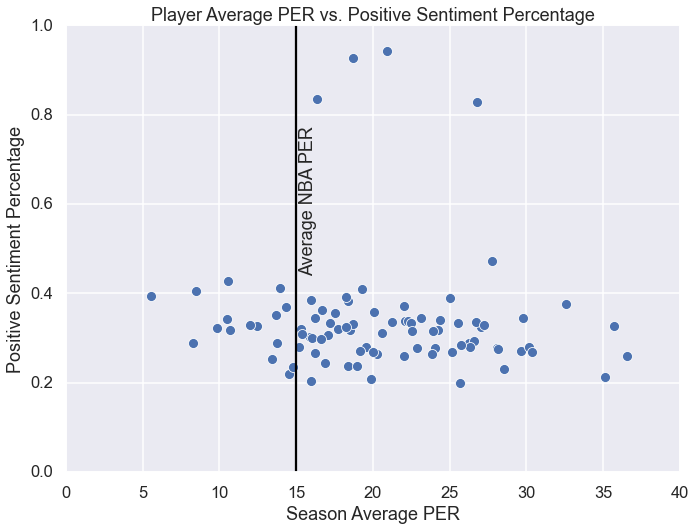

In [416]:
# plot Player Average PER vs. Positive Sentiment Percentage
plt.figure(figsize = (11,8))
sns.set_style("darkgrid")
sns.set_context("talk")
g3 = sns.scatterplot(data = playerOverviewData, x = "Season Average PER", y = "Average Positive Sentiment for All Trends",s = 100)
g3.set(ylim=(0, 1.0))
g3.axvline(15, color = "black")
g3.text(15.2,0.45,'Average NBA PER',rotation=90)
g3.set_title('Player Average PER vs. Positive Sentiment Percentage')
g3.set_xlabel('Season Average PER')
g3.set_ylabel('Positive Sentiment Percentage')


Text(0, 0.5, 'Negative Sentiment Percentage')

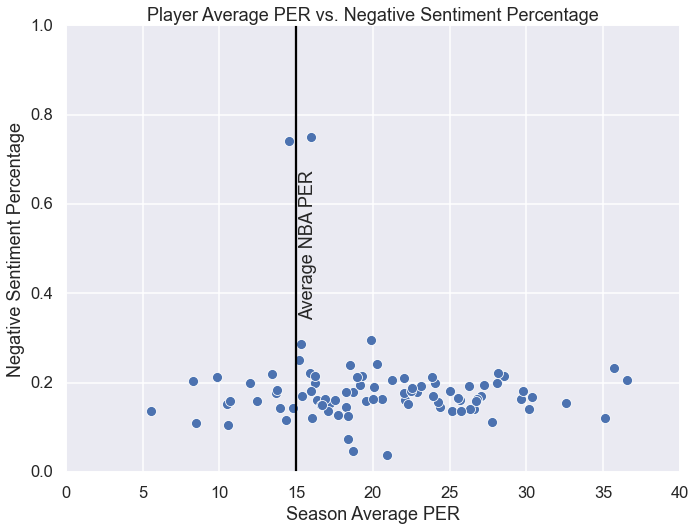

In [415]:
# plot Player Average PER vs. Negative Sentiment Percentage
plt.figure(figsize = (11,8))
sns.set_style("darkgrid")
sns.set_context("talk")
g3 = sns.scatterplot(data = playerOverviewData, x = "Season Average PER", y = "Average Negative Sentiment for All Trends",s = 100)
g3.set(ylim=(0, 1.0))
g3.axvline(15, color = "black")
g3.text(15.2,0.35,'Average NBA PER',rotation=90)
g3.set_title('Player Average PER vs. Negative Sentiment Percentage')
g3.set_xlabel('Season Average PER')
g3.set_ylabel('Negative Sentiment Percentage')


In [481]:
posPerfPosSent = sum(playerOverviewData["Positive Performance and Positive Sentiment Count"])
posPerfNegSent = sum(playerOverviewData["Positive Performance and Negative Sentiment Count"])
negPerfPosSent = sum(playerOverviewData["Negative Performance and Positive Sentiment Count"])
negPerfNegSent = sum(playerOverviewData["Negative Performance and Negative Sentiment Count"])

print(posPerfPosSent)
print(posPerfNegSent)
print(negPerfPosSent)
print(negPerfNegSent)

# count of overall + performances and + sentiment classifications
print("Positive performance trends: " + str(posPerfPosSent + posPerfNegSent))
print("% Positive performance trends with positive sentiment: " + str(posPerfPosSent / (posPerfPosSent + posPerfNegSent)))
# count of overall - performances and - sentiment classifications
print("Negative trends: " + str(negPerfNegSent + negPerfPosSent))
print("% Negative performance trends with negative sentiment: " + str(negPerfNegSent / (negPerfNegSent + negPerfPosSent)))


494
112
460
145
Positive performance trends: 606
% Positive performance trends with positive sentiment: 0.8151815181518152
Negative trends: 605
% Negative performance trends with negative sentiment: 0.2396694214876033


In [370]:
sortedByPERs = playerOverviewData.sort_values("Season Average PER", ascending = False)

In [434]:
# highest performing players
top10PER = sortedByPERs.iloc[:10]
# lower, more average performing players of pool
bottom10PER = sortedByPERs.iloc[-20:-10]

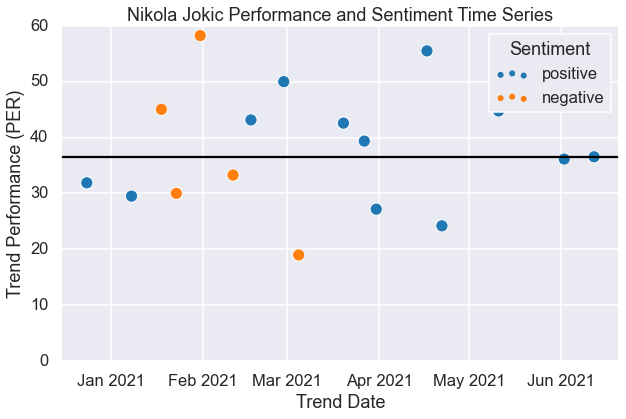

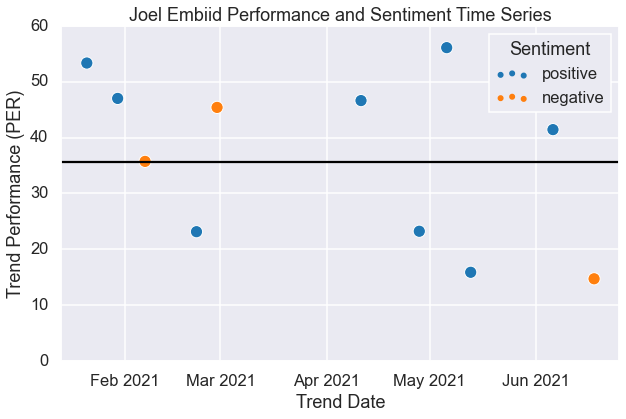

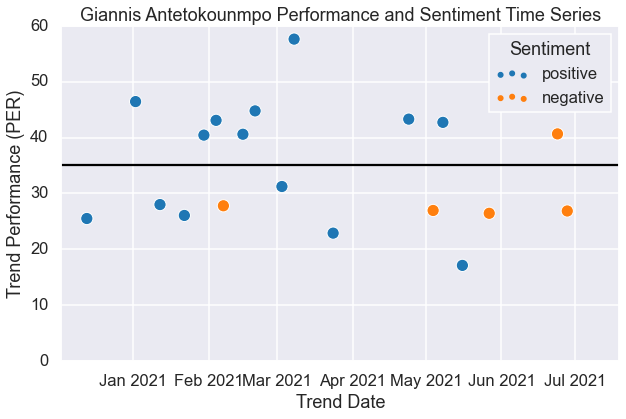

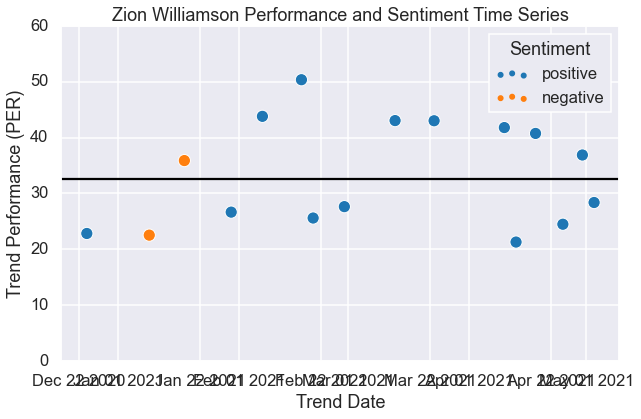

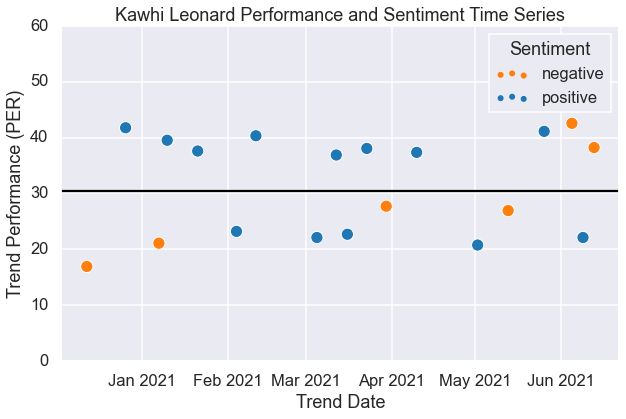

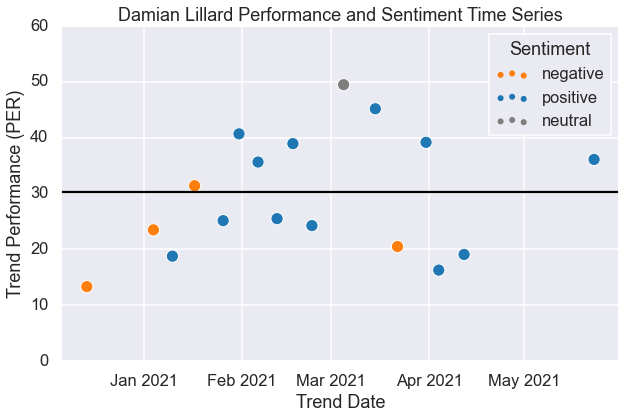

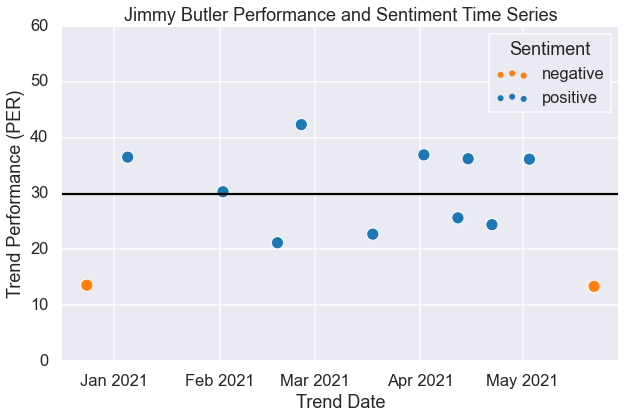

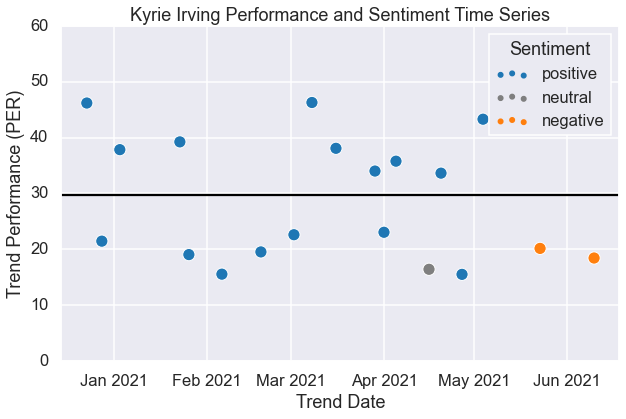

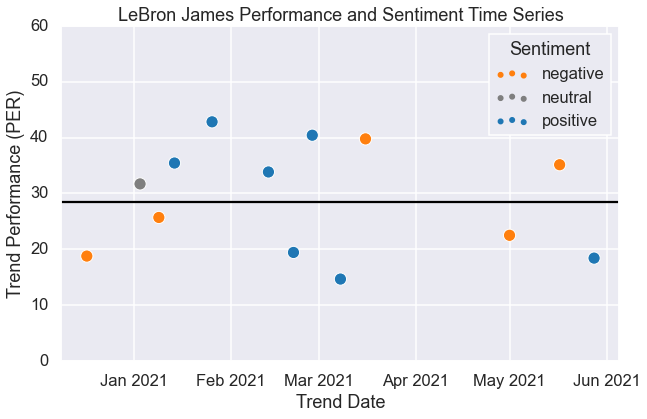

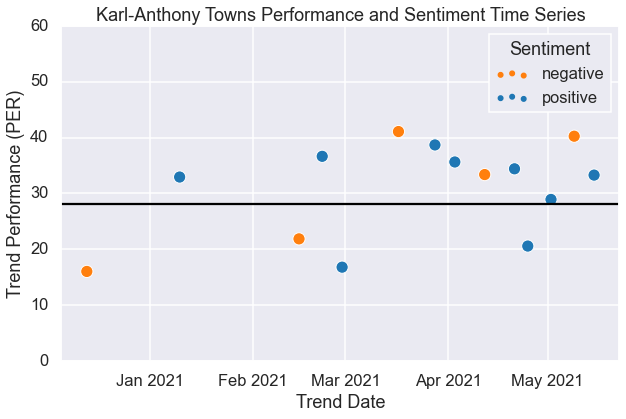

In [476]:
# plot high performing player time series with PER and colored by sentiment
for name in top10PER["Name"]:   
    plt.figure(figsize = (10,6))
    df = getPlayerDataFrame(name)
    palette = {"positive":"tab:blue", "negative":"tab:orange", "neutral":"tab:grey"}
    g = sns.scatterplot(data = df, x = "startDate", y = "avgTrendPER", hue = "sentiment", palette = palette, s = 150)
    g.axhline(df["avgPlayerPER"][0], color = "black")
    g.set(ylim=(0, 60))
    plt.legend(title = "Sentiment")
    g.set_title(name + ' Performance and Sentiment Time Series')
    g.set_xlabel('Trend Date')
    g.set_ylabel('Trend Performance (PER)')

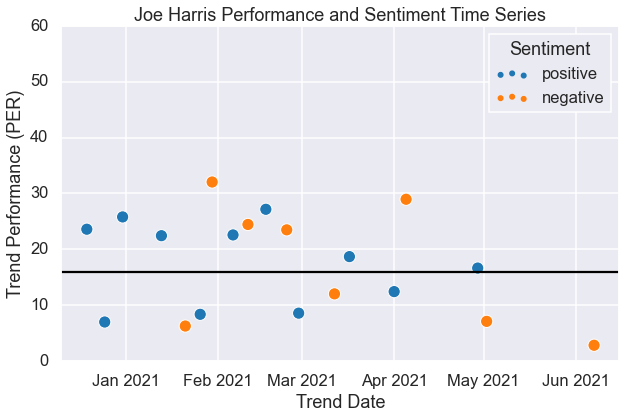

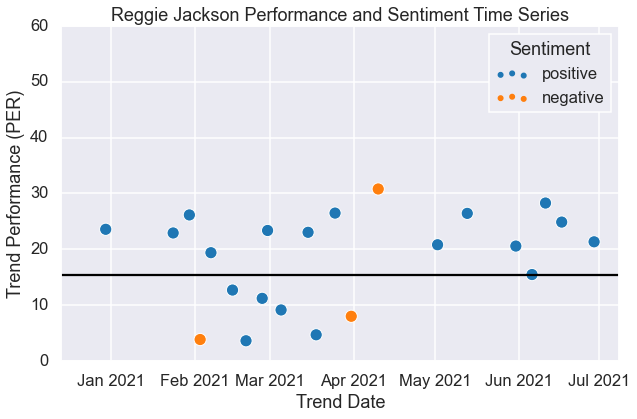

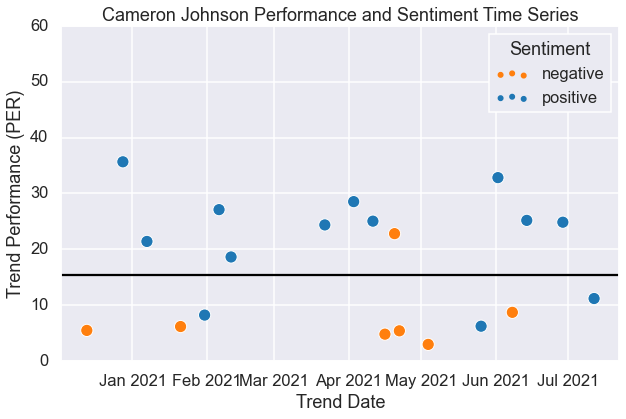

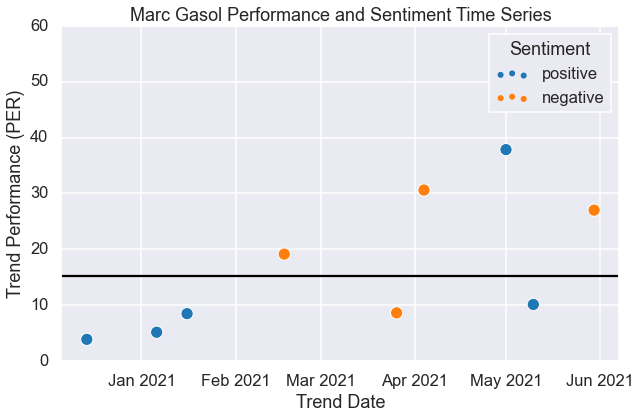

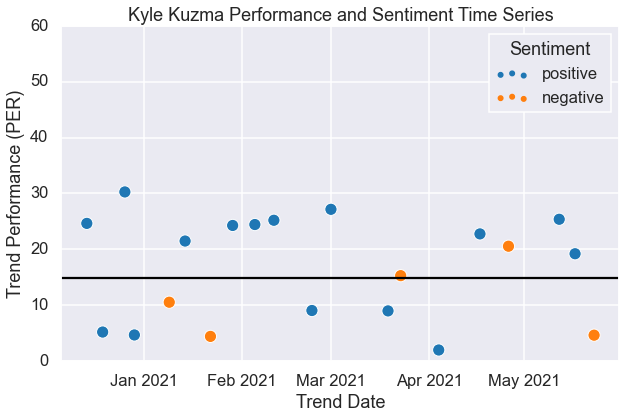

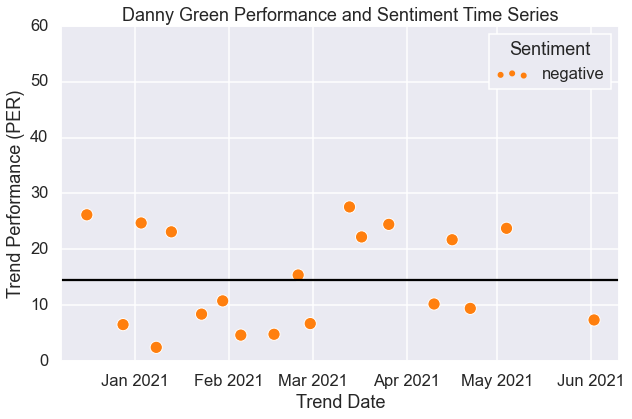

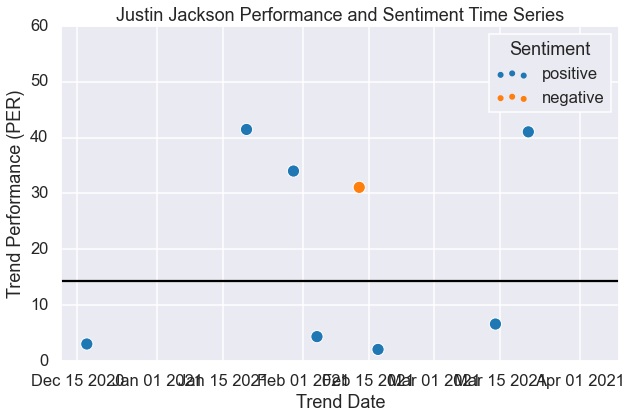

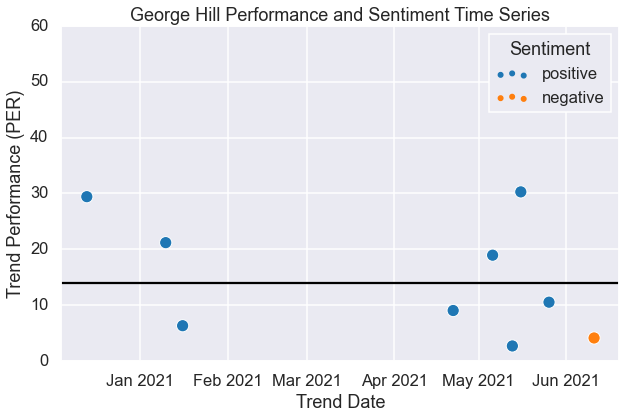

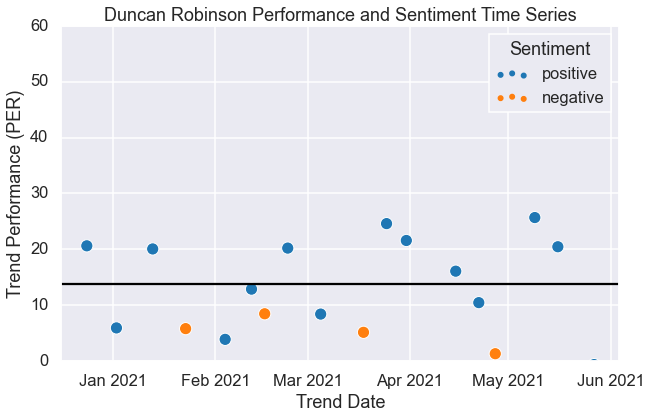

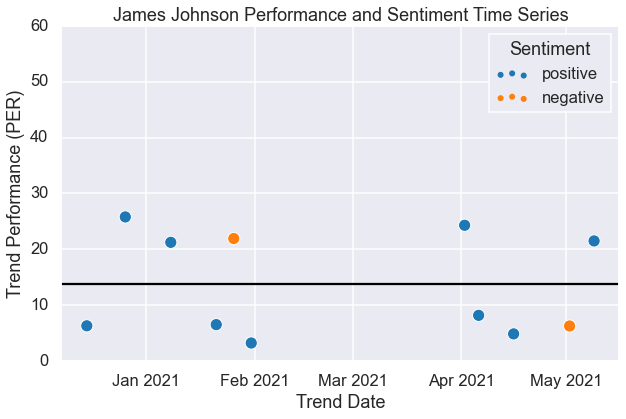

In [477]:
# plot average performing player time series with PER and colored by sentiment
for name in bottom10PER["Name"]:   
    plt.figure(figsize = (10,6))
    df = getPlayerDataFrame(name)
    palette = {"positive":"tab:blue", "negative":"tab:orange", "neutral":"tab:grey"}
    g = sns.scatterplot(data = df, x = "startDate", y = "avgTrendPER", hue = "sentiment", palette = palette, s = 150)
    g.axhline(df["avgPlayerPER"][0], color = "black")
    g.set(ylim=(0, 60))
    plt.legend(title = "Sentiment")
    g.set_title(name + ' Performance and Sentiment Time Series')
    g.set_xlabel('Trend Date')
    g.set_ylabel('Trend Performance (PER)')

In [ ]:
# end of code